# 1.1) Write a function to Get and parse html content from a Wikipedia page

In [1]:
import requests
from bs4 import BeautifulSoup
import string
import numpy as np
import pandas  as pd
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser

# 1. web scraping

In [16]:
HEADERS = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

url = "https://www.imdb.com/chart/top/"
 
#On ouvre la page de l’URL grâce à la fonction urrlib.request.urlopen :

page = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(page.text, 'html.parser')
#print(soup.prettify())

In [3]:
items= soup.findAll("div", {"class" : "sc-c7e5f54-0 gytZrF cli-children"})
#items


In [4]:
news_items = []

for i in items :
    news_i = {}
    note = i.find("span",{"class":"ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating"}).text
    note = note[:3]
    publication_date = i.find("span",{"class":"sc-c7e5f54-8 hgjcbi cli-title-metadata-item"}).text
    title = i.find("h3", {"class" : "ipc-title__text"}).text
    news_i['title'] = title
    news_i['publication_date'] = publication_date
    news_i['note'] = note
    news_items.append(news_i)
    
news_items

[{'title': '1. The Shawshank Redemption',
  'publication_date': '1994',
  'note': '9.3'},
 {'title': '2. The Godfather', 'publication_date': '1972', 'note': '9.2'},
 {'title': '3. The Dark Knight', 'publication_date': '2008', 'note': '9.0'},
 {'title': '4. The Godfather Part II',
  'publication_date': '1974',
  'note': '9.0'},
 {'title': '5. 12 Angry Men', 'publication_date': '1957', 'note': '9.0'},
 {'title': "6. Schindler's List", 'publication_date': '1993', 'note': '9.0'},
 {'title': '7. The Lord of the Rings: The Return of the King',
  'publication_date': '2003',
  'note': '9.0'},
 {'title': '8. Pulp Fiction', 'publication_date': '1994', 'note': '8.9'},
 {'title': '9. The Lord of the Rings: The Fellowship of the Ring',
  'publication_date': '2001',
  'note': '8.8'},
 {'title': '10. Il buono, il brutto, il cattivo',
  'publication_date': '1966',
  'note': '8.8'},
 {'title': '11. Forrest Gump', 'publication_date': '1994', 'note': '8.8'},
 {'title': '12. Fight Club', 'publication_date

# 2. Data analysis with Numpy and Pandas 

#Function create_dataframe(movie_details) 

In [5]:
dataframe = pd.DataFrame(news_items, columns=['title', 'publication_date', 'note'])
dataframe

,title,publication_date,note
0,1. The Shawshank Redemption,1994,9.3
1,2. The Godfather,1972,9.2
2,3. The Dark Knight,2008,9.0
3,4. The Godfather Part II,1974,9.0
4,5. 12 Angry Men,1957,9.0
...,...,...,...
245,246. Les quatre cents coups,1959,8.1
246,247. Persona,1966,8.1
247,248. Life of Brian,1979,8.0
248,249. Aladdin,1992,8.0


In [6]:
dataframe['publication_date'] = pd.to_datetime(dataframe['publication_date'], format= "%Y").dt.year


#Function average_rating(df) 

In [7]:
list_note = []

for i in items :
    
    note = i.find("span",{"class":"ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating"}).text
    note = note[:3]
    note = float(note)
    list_note.append(note)
    new_array = np.array(list_note)
average_rating = np.mean(new_array)
average_rating = "{0:.1f}".format(average_rating)
average_rating = float(average_rating)
print(" the average IMDb rating for the first 250 films is : " , average_rating)

    

 the average IMDb rating for the first 250 films is :  8.3


#Function movies_per_decade(df) 

In [8]:
#Renvoie un dictionnaire indiquant le nombre de films sortis chaque décennie.
serie = pd.Series(dataframe["publication_date"])
list_values = serie.values.tolist()
list_values_sorted = sorted(list_values)  


dictio = dict(Counter(list_values_sorted)) 

df = pd.DataFrame(list(dictio.items()))
df.columns = ['year',  'nbr_movies']
 

def todecade(y):
  if y < 2000:
    return 'decade ' + str(y)[2] + '0'
  else:
    return 'decade ' + '0'+ str(y)[2] 
df["decade"] = df["year"].apply(todecade)


In [9]:
value = df.groupby('decade')['nbr_movies'].sum()
movies_per_decade = value.to_dict()
print("dictionary showing the number of films released each decade : ", movies_per_decade)


dictionary showing the number of films released each decade :  {'decade 00': 48, 'decade 01': 43, 'decade 02': 7, 'decade 20': 6, 'decade 30': 7, 'decade 40': 12, 'decade 50': 23, 'decade 60': 18, 'decade 70': 18, 'decade 80': 26, 'decade 90': 42}


# Functions highest_rated_movie(df) and lowest_rated_movie(df)



In [10]:
print('THE HIGHEST RATED MOVIE ARE : ')
for index,  row in dataframe.iterrows():
    if float(row["note"]) >=  max(list_note):
        print(row['title'])
        print("published in ", row["publication_date"])
        print("with a grade of ", row["note"])
        print("-------------------------------------------------------------------")
print('THE LOWEST RATED MOVIE ARE : ')
for index,  row in dataframe.iterrows():
    if float(row["note"]) <=  min(list_note):
        
        print(row['title'])
        print("published in ", row["publication_date"])
        print("with a grade of ", row["note"])
 

THE HIGHEST RATED MOVIE ARE : 
1. The Shawshank Redemption
published in  1994
with a grade of  9.3
-------------------------------------------------------------------
THE LOWEST RATED MOVIE ARE : 
230. The Incredibles
published in  2004
with a grade of  8.0
236. Groundhog Day
published in  1993
with a grade of  8.0
248. Life of Brian
published in  1979
with a grade of  8.0
249. Aladdin
published in  1992
with a grade of  8.0
250. Dances with Wolves
published in  1990
with a grade of  8.0


# 3. Visualization

Fonction plot_rating_distribution(df)

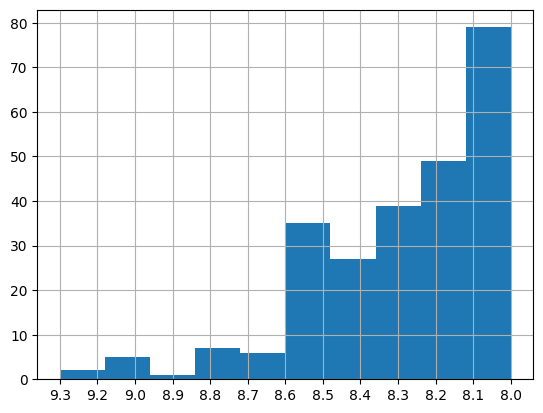

In [11]:
hist = dataframe['note'].hist()

plt.savefig("pandas_hist_01.png", bbox_inches='tight', dpi=100)

Function plot_movies_per_decade(df)

In [15]:
#dates are rearranged to make the diagram easier to read
del movies_per_decade['decade 00']
del movies_per_decade['decade 01']
del movies_per_decade['decade 02']
movies_per_decade['decade 00']=48
movies_per_decade['decade 01']= 43
movies_per_decade['decade 02']= 7


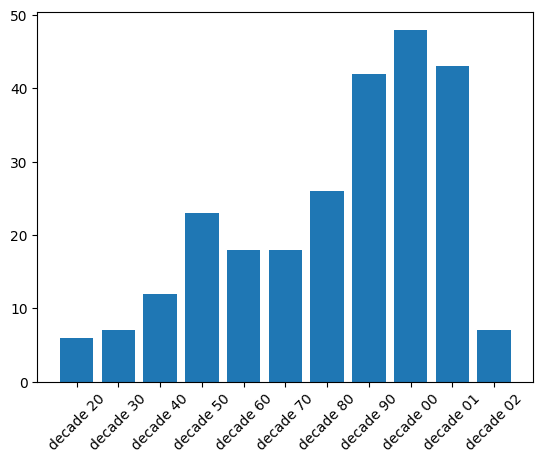

<Figure size 640x480 with 0 Axes>

In [14]:
# Affiche un diagramme à barres montrant le nombre de films de la liste des 250 premiers films sortis chaque décennie.

names = movies_per_decade.keys()
values = movies_per_decade.values()

plt.bar(names, values) 
plt.xticks(rotation=45)
plt.show()
plt.savefig("pandas_hist_02.png", bbox_inches='tight', dpi=100)